<a href="https://colab.research.google.com/github/gh0st-kid/TimeSerieseProject/blob/main/TSPreparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split, TimeSeriesSplit, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.metrics import (mean_squared_error, mean_absolute_error,
                             mean_absolute_percentage_error, r2_score,
                             accuracy_score, classification_report,
                             confusion_matrix)
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from scipy.stats import shapiro
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [16]:
def check_versions():
  print(f'Pandas версия: {pd.__version__}')
  print(f'Numpy версия: {np.__version__}')
  print(f'Matplotlib версия: {plt.matplotlib.__version__}')
  print(f'Seaborn версия: {sns.__version__}')
  print(f'Scikit-learn версия: {sklearn.__version__}')
  print(f'Statsmodels версия: {sm.__version__}')
  print(f'Библиотеки успешно импортированы.')

check_versions()

Pandas версия: 2.1.4
Numpy версия: 1.26.4
Matplotlib версия: 3.7.1
Seaborn версия: 0.13.1
Scikit-learn версия: 1.5.2
Statsmodels версия: 0.14.3
Библиотеки успешно импортированы.


In [3]:
def load_and_prepare_data(file_path):
  """
  Загружает и подготавливает данные из CSV файла.

  Аргументы:
  file_path : str
      Путь к CSV файлу с данными.

  Возвращает:
  pandas.DataFrame
      Подготовленный датафрейм с данными, где:
    - Удалены пробелы из названий столбцов.
    - Столбец 'year' преобразован в формат даты и установлен в качестве индекса.
    - Все числовые столбцы преобразованы в тип float.
    - Данные отсортированы по году.
  """
  df = pd.read_csv(file_path, delimiter=';')
  df.columns = df.columns.str.strip()
  df['year'] = pd.to_datetime(df['year'], format='%Y') + pd.offsets.YearEnd(0)
  numeric_columns = df.columns[1:]
  df[numeric_columns] = df[numeric_columns].astype(float)
  df.sort_values('year', inplace=True)
  df.set_index('year', inplace=True)
  return df

df = load_and_prepare_data('/content/Data_new.csv')

In [4]:
df.head()

,zan(cfo),zan(szfo),zan(ufo),zan(skfo),zan(pfo),zan(uralfo),zan(sfo),zan(dfo),bezr(cfo),bezr(szfo),...,bezr(sfo),bezr(dfo),srd(cfo),srd(szfo),srd(ufo),srd(skfo),srd(pfo),srd(uralfo),srd(sfo),srd(dfo)
year,,,,,,,,,,,,,,,,,,,,,
2000-12-31,18014.45,6684.28,5850.76,2603.97,14242.84,5720.02,7933.75,4020.35,1516.38,710.35,...,1124.00,628.32,3231.0,2269.0,1592.0,1130.0,1726.0,2744.0,1933.0,2498.0
2001-12-31,18209.86,6788.93,5846.68,2653.35,14225.29,5642.28,7817.38,3939.14,1165.34,556.96,...,929.68,521.56,4300.0,3084.0,2165.0,1441.0,2319.0,3820.0,2576.0,3304.0
2002-12-31,18596.99,6911.31,6071.07,2762.83,14457.40,5733.71,8054.44,4071.13,1000.25,460.45,...,868.63,435.51,5436.0,4010.0,2898.0,1922.0,3035.0,4791.0,3373.0,4391.0
2003-12-31,18609.92,6873.34,5816.19,2765.72,14280.29,5974.66,7972.59,4046.69,1002.11,516.25,...,972.79,455.21,7211.0,5403.0,3747.0,2532.0,3917.0,6110.0,4351.0,5788.0
2004-12-31,18912.54,6970.38,6156.19,2769.92,14378.12,5938.58,8179.20,4013.68,930.45,443.38,...,853.29,442.81,8992.0,6938.0,4565.0,3466.0,4787.0,7413.0,5267.0,7047.0


In [5]:
def plot_time_series(data, filter_str, title, ylabel):
  """
  Строит график временного ряда на основе переданных данных.

  Аргументы:
  data : pandas.DataFrame
      Датафрейм с данными для построения графика.
  filter_str : str
      Подстрока для фильтрации колонок в датафрейме.
  title : str
      Заголовок графика.
  ylabel : str
      Название оси Y.

  Возвращает:
  None
      Функция отображает график временного ряда и не возвращает значения.
  """
  sns.set(style='whitegrid')
  sns.set_palette('pastel')
  plt.figure(figsize=(12, 8))
  sns.lineplot(data=data.filter(like=filter_str), markers=True)
  plt.title(title, fontsize=16)
  plt.xlabel('Год', fontsize=14)
  plt.ylabel(ylabel, fontsize=14)
  plt.legend(title='Округа', bbox_to_anchor=(1.05, 1), loc='upper left')
  plt.grid(True)
  plt.show()

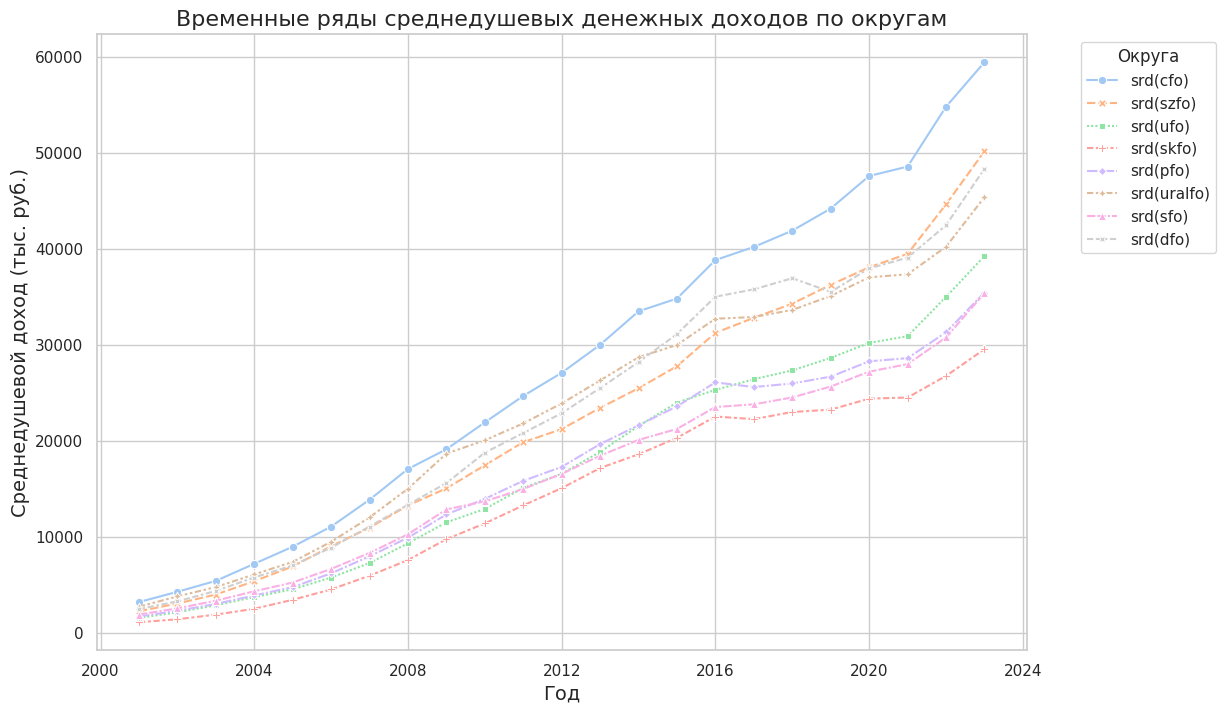

In [6]:
plot_time_series(df, 'srd',
                 'Временные ряды среднедушевых денежных доходов по округам',
                 'Среднедушевой доход (тыс. руб.)')

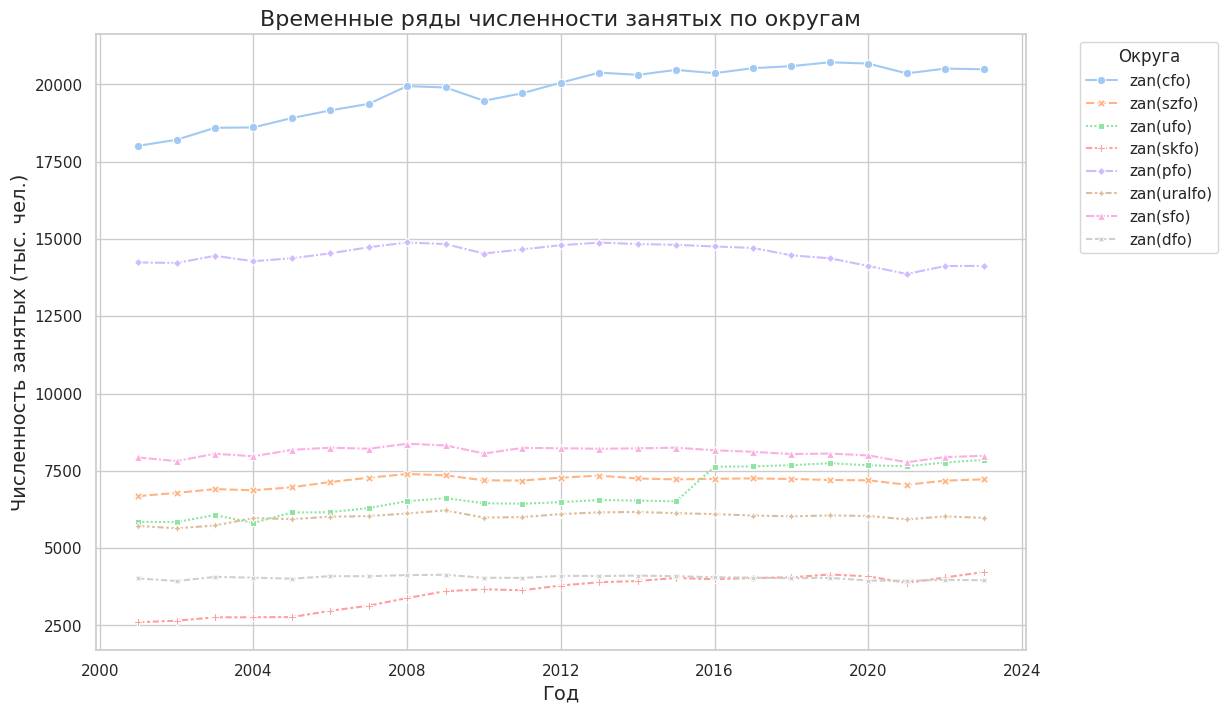

In [7]:
plot_time_series(df, 'zan',
                 'Временные ряды численности занятых по округам',
                 'Численность занятых (тыс. чел.)')

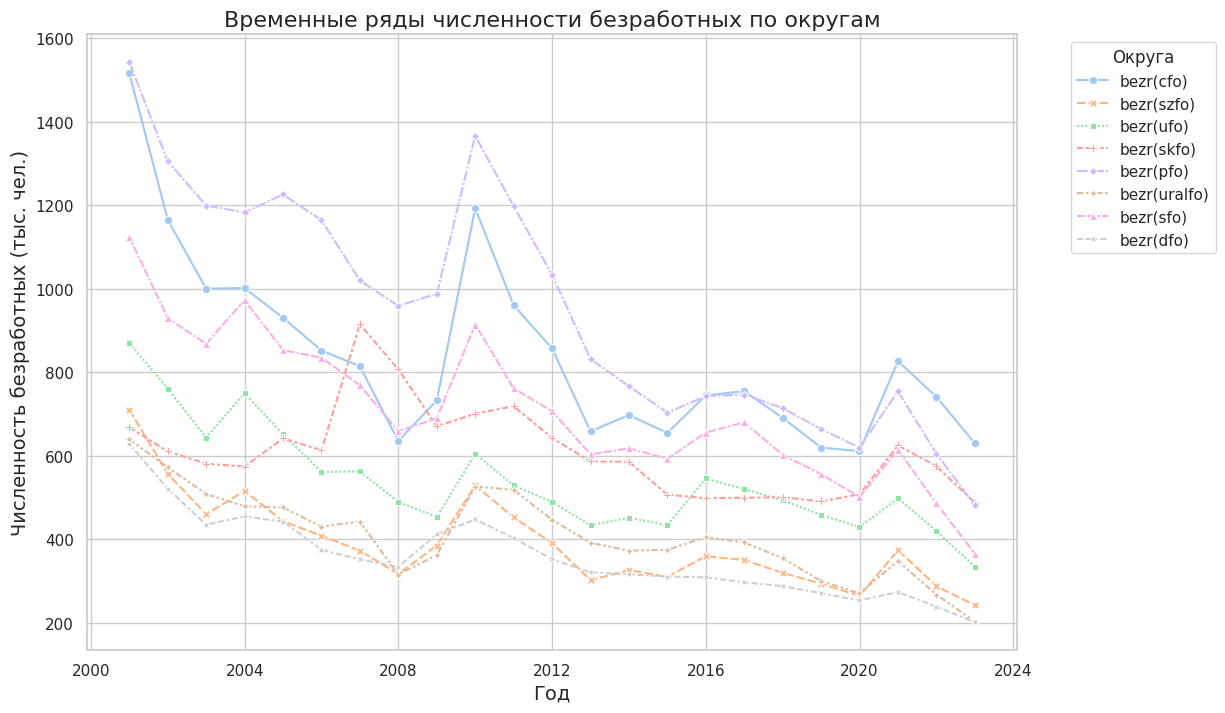

In [10]:
plot_time_series(df, 'bezr',
                 'Временные ряды численности безработных по округам',
                 'Численность безработных (тыс. чел.)')

In [11]:
def analyze_variable(data, column_name):
  """
  Анализирует и визуализирует временной ряд для указанной переменной.

  Аргументы:
  data : pandas.DataFrame
      Датафрейм с данными.
  column_name : str
      Название переменной(столбца) для анализа.

  Возвращает:
  None
      Функция выводит статистику переменной и отображает график временного
      ряда, не возвращая значений.
  """
  data = df.loc[:, [column_name]]
  stats = data.describe()

  # Вывод статистики
  print(f'статистика для переменной {column_name}')
  print(stats)

  # Визуализация временного ряда
  plt.figure(figsize=(12, 6))
  sns.lineplot(x=data.index, y=column_name, data=data, marker='o', label=column_name)
  plt.title(f'Временной ряд переменной {column_name}')
  plt.xlabel('Год')
  plt.ylabel(column_name)
  plt.legend()
  plt.grid(True)
  plt.show()

статистика для переменной zan(ufo)
          zan(ufo)
count    23.000000
mean   6782.708696
std     728.793538
min    5816.190000
25%    6231.690000
50%    6520.040000
75%    7647.220000
max    7855.220000


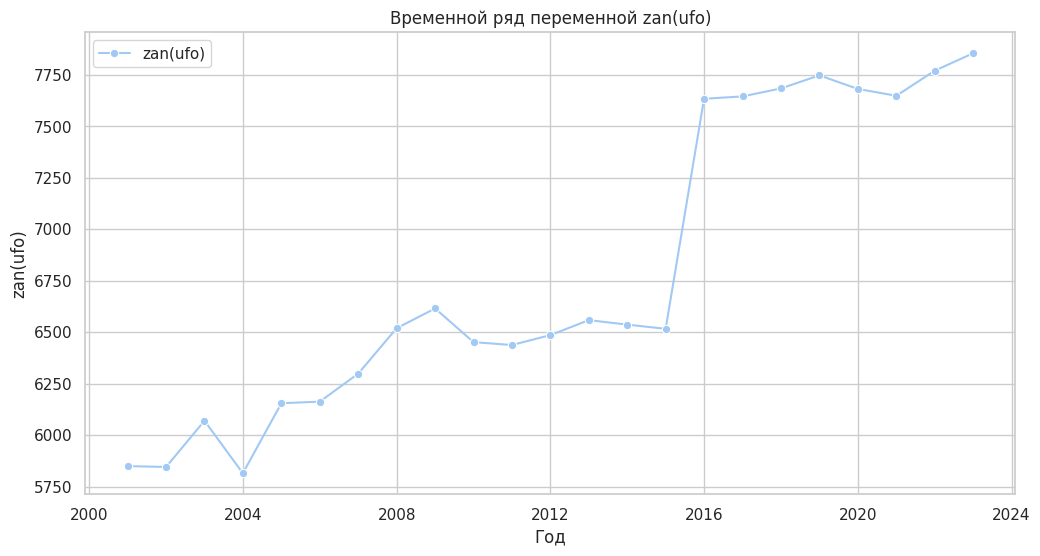

In [12]:
analyze_variable(df,'zan(ufo)')

In [18]:
def decompose_time_series(df, column_name):
    """
    Выполняет декомпозицию временного ряда на тренд, сезонность и остаток.

    Аргументы:
    df : pandas.DataFrame
      Датасет, содержащий временной ряд.
    column_name : str
      Название колонки, содержащей временной ряд для декомпозиции.

    Возвращает:
    None

    Дополнительно:
    Выводит графики исходного ряда, тренда, сезонности и остатка.
    """
    # Декомпозиция временного ряда на тренд, сезонность и остаток
    result = seasonal_decompose(df[column_name], model='additive', period=1)
    trend = result.trend
    seasonal = result.seasonal
    residual = result.resid

    # Визуализация результатов
    plt.figure(figsize=(12, 8))

    plt.subplot(4, 1, 1)
    plt.plot(df[column_name], label='Исходный ряд', color='blue')
    plt.legend(loc='upper left')
    plt.title(f'Исходный временной ряд: {column_name}')

    plt.subplot(4, 1, 2)
    plt.plot(trend, label='Тренд', color='orange')
    plt.legend(loc='upper left')
    plt.title('Тренд')

    plt.subplot(4, 1, 3)
    plt.plot(seasonal, label='Сезонность', color='green')
    plt.legend(loc='upper left')
    plt.title('Сезонность')

    plt.subplot(4, 1, 4)
    plt.plot(residual, label='Остаток', color='red')
    plt.legend(loc='upper left')
    plt.title('Остаток')

    plt.tight_layout()
    plt.show()

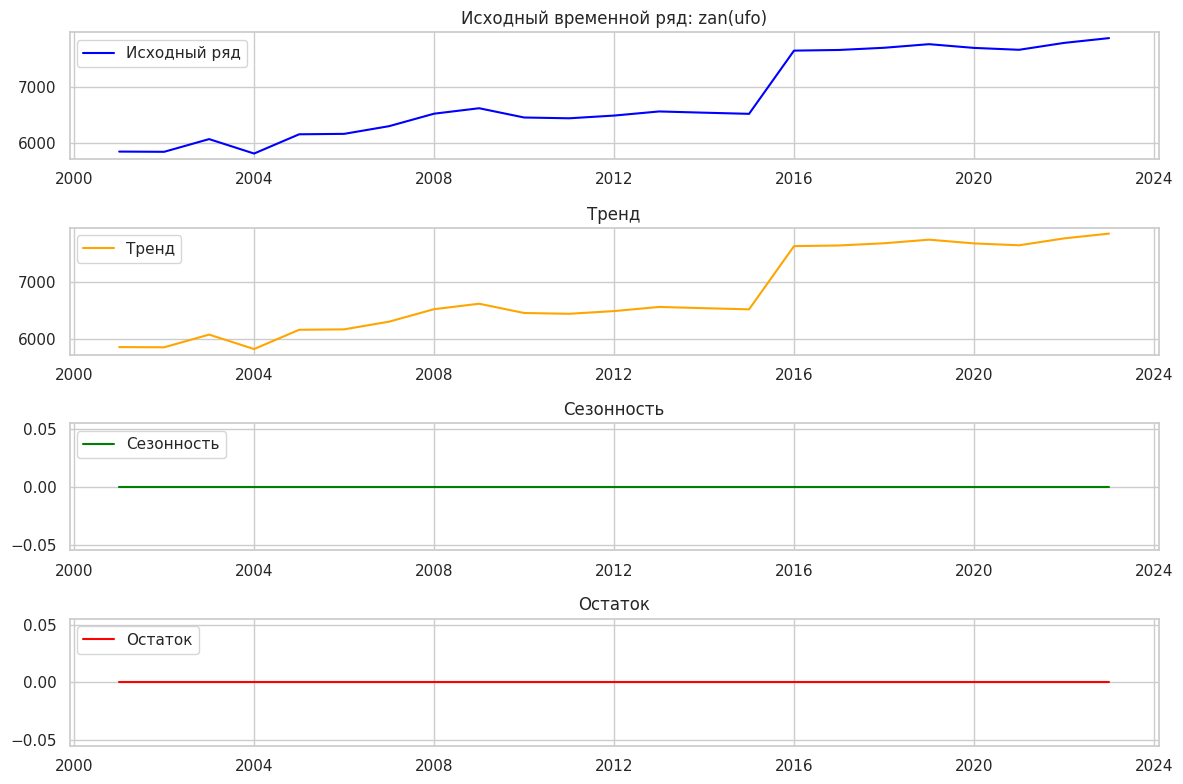

In [19]:
decompose_time_series(df, 'zan(ufo)')

In [13]:
def adf_test(series):
    """
    Проводит тест на единичный корень(ADF-тест) для проверки стационарности
    временного ряда.

    Аргументы:
    series : pandas.Series
      Временной ряд, который нужно протестировать на стационарность.

    Возвращает:
    bool
      True, если временной ряд стационарен(p-value <= 0.05), иначе False.

    Дополнительно:
    Выводит на экран статистику ADF, p-value и критические значения.
    """
    result = adfuller(series, autolag='AIC')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])
    return result[1] <= 0.05

In [17]:
adf_test(df['bezr(ufo)'])

ADF Statistic: -2.5448248980818597
p-value: 0.10494527019480482
Critical Values: {'1%': -3.769732625845229, '5%': -3.005425537190083, '10%': -2.6425009917355373}


False

In [20]:
def differentiate_series(data, variable_name, max_diff=5):
    """
    Приводит временной ряд из датафрейма к стационарному виду путём
    дифференциации.

    Аргументы:
    data : pandas.DataFrame
      Датафрейм, содержащий временные ряды.
    variable_name : str
      Название переменной(столбца), который нужно дифференцировать для
      достижения стационрности.
    max_diff : int, optional
      Максимальное количество дифференциаций, которые можно выполнить.
      По умолчанию 5.

    Возвращает:
      -pandas.DataFrame : Датафрейм с дифференцированными временными рядами.

    Дополнительно:
    Если ряд становится стационарным до достижения максимального количества
    дифференциаций, процесс останавливается и возвращается результат на этом
    этапе. Если ряд уже стационарен, выводится соответствующее сообщение.
    """
    series = data[variable_name]
    df_diff = pd.DataFrame()
    num_diff = 0

    if adf_test(series):
      print('Исходный ряд уже стационарен. Дифференциация не требуется.')
      return None

    while num_diff <= max_diff:
      if adf_test(series):
        print(f'Ряд стационарен после {num_diff} дифференциаций.')
        break
      series = series.diff().dropna()
      num_diff += 1
      suffix = f'_diff_{num_diff}'
      df_diff[f'{variable_name}{suffix}'] = series

    if num_diff > max_diff and not adf_test(series):
      print(f'Превышено максимально количество дифференциаций ({max_diff})./nРяд всё ещё не стационарен')

    return df_diff

In [21]:
differentiate_series(df, 'bezr(ufo)')

ADF Statistic: -2.5448248980818597
p-value: 0.10494527019480482
Critical Values: {'1%': -3.769732625845229, '5%': -3.005425537190083, '10%': -2.6425009917355373}
ADF Statistic: -2.5448248980818597
p-value: 0.10494527019480482
Critical Values: {'1%': -3.769732625845229, '5%': -3.005425537190083, '10%': -2.6425009917355373}
ADF Statistic: 0.8294880679823573
p-value: 0.9920975535603199
Critical Values: {'1%': -4.137829282407408, '5%': -3.1549724074074077, '10%': -2.7144769444444443}
ADF Statistic: 1.576961915657635
p-value: 0.9977867869711872
Critical Values: {'1%': -4.137829282407408, '5%': -3.1549724074074077, '10%': -2.7144769444444443}
ADF Statistic: 1.0763952559368515
p-value: 0.9950100444711059
Critical Values: {'1%': -4.223238279489106, '5%': -3.189368925619835, '10%': -2.729839421487603}
ADF Statistic: -2.704969712973984
p-value: 0.073182232742945
Critical Values: {'1%': -4.223238279489106, '5%': -3.189368925619835, '10%': -2.729839421487603}
ADF Statistic: -6.467743170174151
p-va

,bezr(ufo)_diff_1,bezr(ufo)_diff_2,bezr(ufo)_diff_3,bezr(ufo)_diff_4,bezr(ufo)_diff_5
year,,,,,
2001-12-31,-108.97,NaN,NaN,NaN,NaN
2002-12-31,-117.17,-8.20,NaN,NaN,NaN
2003-12-31,106.16,223.33,231.53,NaN,NaN
2004-12-31,-98.76,-204.92,-428.25,-659.78,NaN
2005-12-31,-89.55,9.21,214.13,642.38,1302.16
2006-12-31,1.11,90.66,81.45,-132.68,-775.06
2007-12-31,-73.01,-74.12,-164.78,-246.23,-113.55
2008-12-31,-36.08,36.93,111.05,275.83,522.06
2009-12-31,151.16,187.24,150.31,39.26,-236.57


In [22]:
def plot_stationary_series(series, variable_name, num_diff):
    """
    Визуализирует дифференцированный временной ряд.

    Аргументы:
    series : pandas.Series
      Дифференцированный временной ряд, который нужно визуализировать.
    variable_name : str
      Название переменной(столбца), соответствующего данному временному ряду.
    num_diff : int
      Количество проведённых дифференциаций, после которых получен данный ряд.

    Возвращает:
      None

    Дополнительно:
    Отображает график дифференцированного временного ряда.
    """
    plt.figure(figsize=(12, 6))
    plt.plot(series)
    plt.title(f'Дифференцированный ряд {variable_name} (после {num_diff} дифференциаций)')
    plt.show()

In [27]:
df_diff = differentiate_series(df, 'bezr(ufo)')

ADF Statistic: -2.5448248980818597
p-value: 0.10494527019480482
Critical Values: {'1%': -3.769732625845229, '5%': -3.005425537190083, '10%': -2.6425009917355373}
ADF Statistic: -2.5448248980818597
p-value: 0.10494527019480482
Critical Values: {'1%': -3.769732625845229, '5%': -3.005425537190083, '10%': -2.6425009917355373}
ADF Statistic: 0.8294880679823573
p-value: 0.9920975535603199
Critical Values: {'1%': -4.137829282407408, '5%': -3.1549724074074077, '10%': -2.7144769444444443}
ADF Statistic: 1.576961915657635
p-value: 0.9977867869711872
Critical Values: {'1%': -4.137829282407408, '5%': -3.1549724074074077, '10%': -2.7144769444444443}
ADF Statistic: 1.0763952559368515
p-value: 0.9950100444711059
Critical Values: {'1%': -4.223238279489106, '5%': -3.189368925619835, '10%': -2.729839421487603}
ADF Statistic: -2.704969712973984
p-value: 0.073182232742945
Critical Values: {'1%': -4.223238279489106, '5%': -3.189368925619835, '10%': -2.729839421487603}
ADF Statistic: -6.467743170174151
p-va

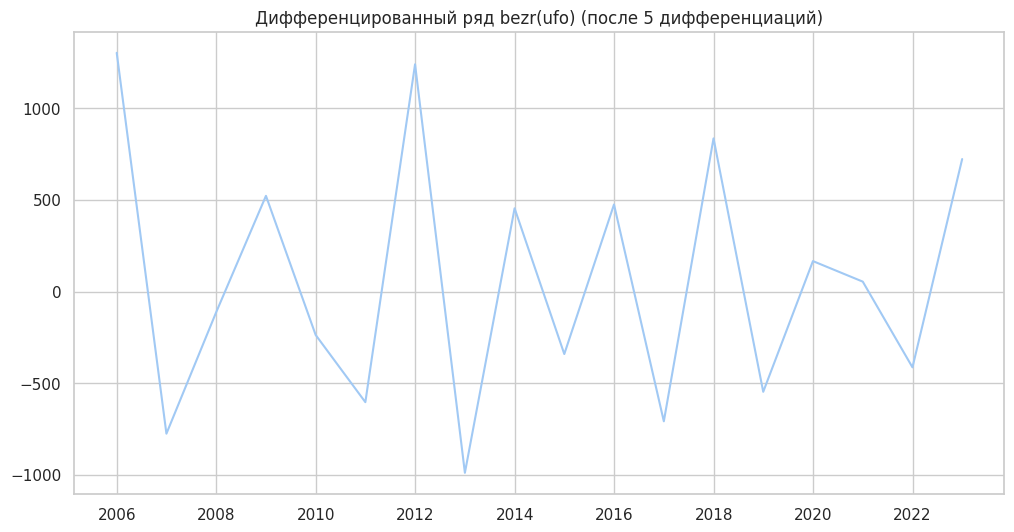

In [28]:
plot_stationary_series(df_diff['bezr(ufo)_diff_5'], 'bezr(ufo)', num_diff=5)

In [29]:
# Функция для построения ACF и PACF
def plot_acf_pacf(series, lags=10):
    """
    Строит графики автокорреляционной функции(ACF) и частичной
    автокорреляционной функции(PACF) для стационарного временного
    ряда.

    Аргументы:
    series : pandas.Series
        Стационарный временной ряд, для которого нужно построить
        графики ACF и PACF.
    lags : int
        Количество лагов для анализа.

    Возвращает:
    None

    Дополнительно:
    Отображает два графика: ACF и PACF.
    """
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    #ACF
    plot_acf(series, ax=axes[0])
    axes[0].set_title('ACF')

    #PACF
    plot_pacf(series, ax=axes[1])
    axes[1].set_title('PACF')

    plt.show()

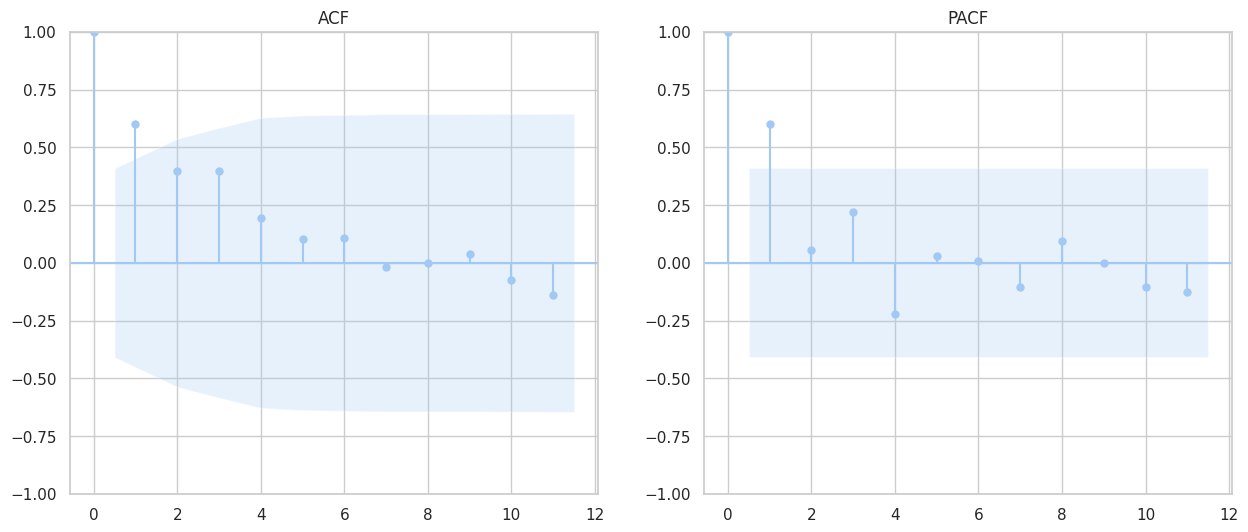

In [30]:
plot_acf_pacf(df['bezr(ufo)'].dropna(), lags=10)

In [31]:
def pipeline(data, variable_name, max_diff=5, plot_diff_series=True, plot_acf_pacf_flag=True, lags=10):
    """
    Выполняет конвейерный анализ временного ряда, включая проверку на стационарность,
    дифференциацию, визуализацию ряда и построение ACF/PACF графиков.

    Аргументы:
    data : pandas.DataFrame
        Датафрейм, содержащий временные ряды.
    variable_name : str
        Название переменной (столбца), которую нужно анализировать.
    max_diff : int, optional
        Максимальное количество дифференциаций для достижения стационарности. По умолчанию 5.
    plot_diff_series : bool, optional
        Флаг, определяющий, нужно ли визуализировать дифференцированный ряд. По умолчанию True.
    plot_acf_pacf_flag : bool, optional
        Флаг, определяющий, нужно ли строить графики ACF и PACF. По умолчанию True.
    lags : int, optional
        Количество лагов для графиков ACF и PACF. По умолчанию 10.

    Возвращает:
    None

    Дополнительно:
    В зависимости от переданных параметров, функция выполняет соответствующие шаги анализа.
    """
    # Шаг 1: Дифференциация временного ряда для достижения стационарности
    df_diff = differentiate_series(data, variable_name, max_diff=max_diff)

    if df_diff is not None:
        # Если ряд был дифференцирован, извлекаем последний стационарный ряд
        last_stationary_series = df_diff.iloc[:, -1]
        num_diff = len(df_diff.columns)

        # Шаг 2: Визуализация дифференцированного ряда
        if plot_diff_series:
            plot_stationary_series(last_stationary_series, variable_name, num_diff)

        # Шаг 3: Построение графиков ACF и PACF для стационарного ряда
        if plot_acf_pacf_flag:
            plot_acf_pacf(last_stationary_series.dropna(), lags=lags)
    else:
        # Если дифференциация не потребовалась и ряд изначально стационарен
        print('Исходный ряд уже стационарен. Дифференциация не требуется.')

        # Визуализация исходного стационарного ряда
        if plot_diff_series:
            plt.figure(figsize=(12, 6))
            plt.plot(data[variable_name])
            plt.title(f'Исходный стационарный ряд {variable_name}')
            plt.show()

        # Построение графиков ACF и PACF для исходного ряда
        if plot_acf_pacf_flag:
            plot_acf_pacf(data[variable_name], lags=lags)

    print("Анализ завершен.")

ADF Statistic: -2.5448248980818597
p-value: 0.10494527019480482
Critical Values: {'1%': -3.769732625845229, '5%': -3.005425537190083, '10%': -2.6425009917355373}
ADF Statistic: -2.5448248980818597
p-value: 0.10494527019480482
Critical Values: {'1%': -3.769732625845229, '5%': -3.005425537190083, '10%': -2.6425009917355373}
ADF Statistic: 0.8294880679823573
p-value: 0.9920975535603199
Critical Values: {'1%': -4.137829282407408, '5%': -3.1549724074074077, '10%': -2.7144769444444443}
ADF Statistic: 1.576961915657635
p-value: 0.9977867869711872
Critical Values: {'1%': -4.137829282407408, '5%': -3.1549724074074077, '10%': -2.7144769444444443}
ADF Statistic: 1.0763952559368515
p-value: 0.9950100444711059
Critical Values: {'1%': -4.223238279489106, '5%': -3.189368925619835, '10%': -2.729839421487603}
ADF Statistic: -2.704969712973984
p-value: 0.073182232742945
Critical Values: {'1%': -4.223238279489106, '5%': -3.189368925619835, '10%': -2.729839421487603}
ADF Statistic: -6.467743170174151
p-va

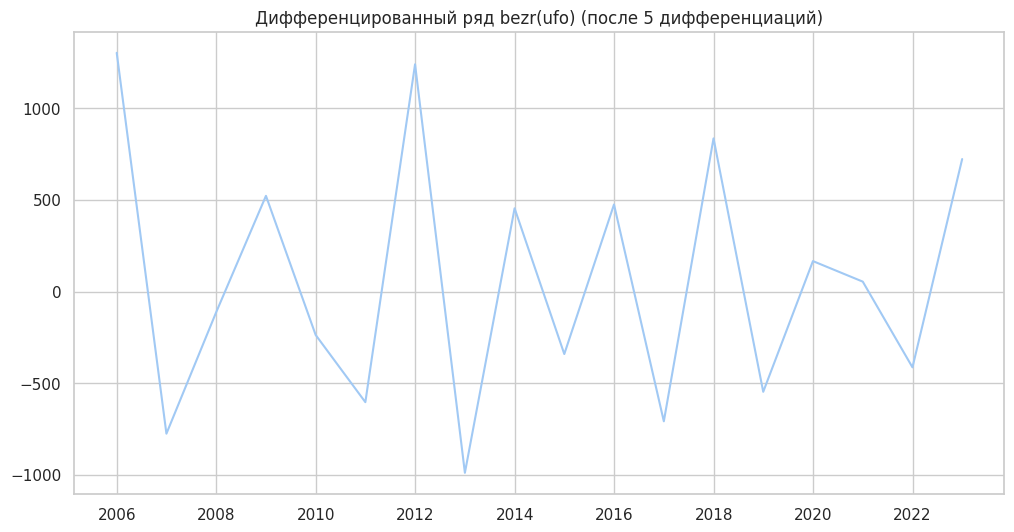

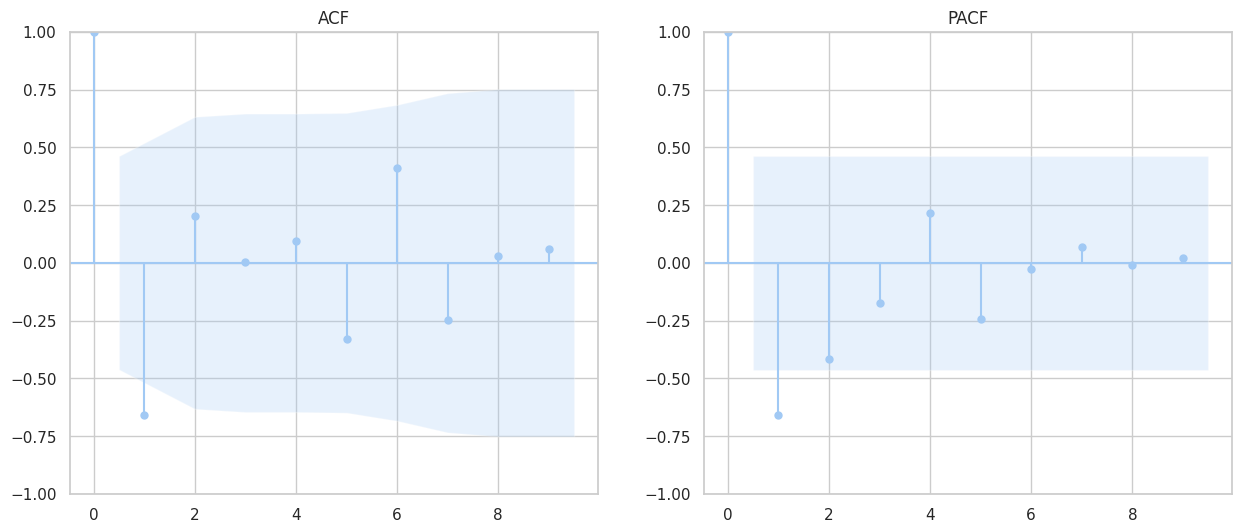

Анализ завершен.


In [32]:
pipeline(df, 'bezr(ufo)', plot_diff_series=True, plot_acf_pacf_flag=True)

ADF Statistic: -3.811750648580236
p-value: 0.0027893528260389696
Critical Values: {'1%': -3.769732625845229, '5%': -3.005425537190083, '10%': -2.6425009917355373}
Исходный ряд уже стационарен. Дифференциация не требуется.
Исходный ряд уже стационарен. Дифференциация не требуется.


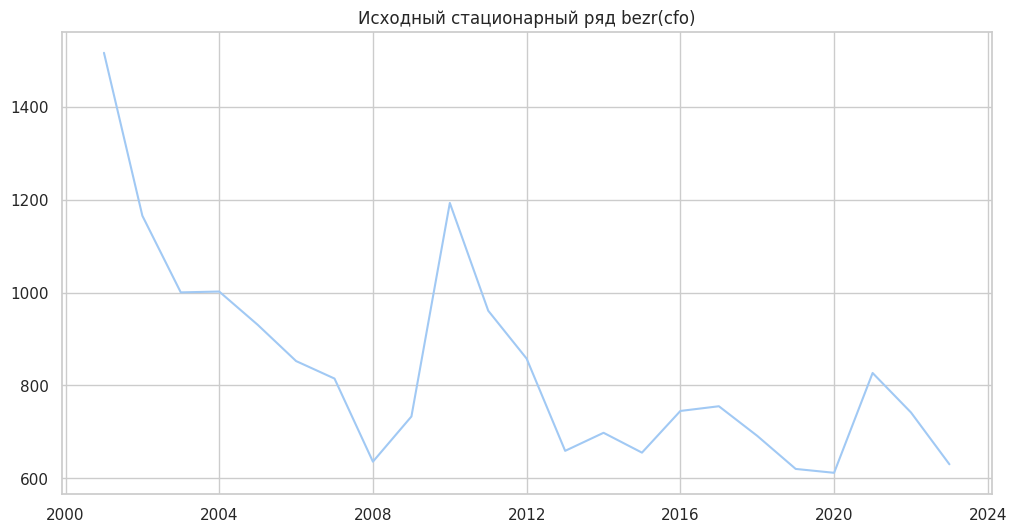

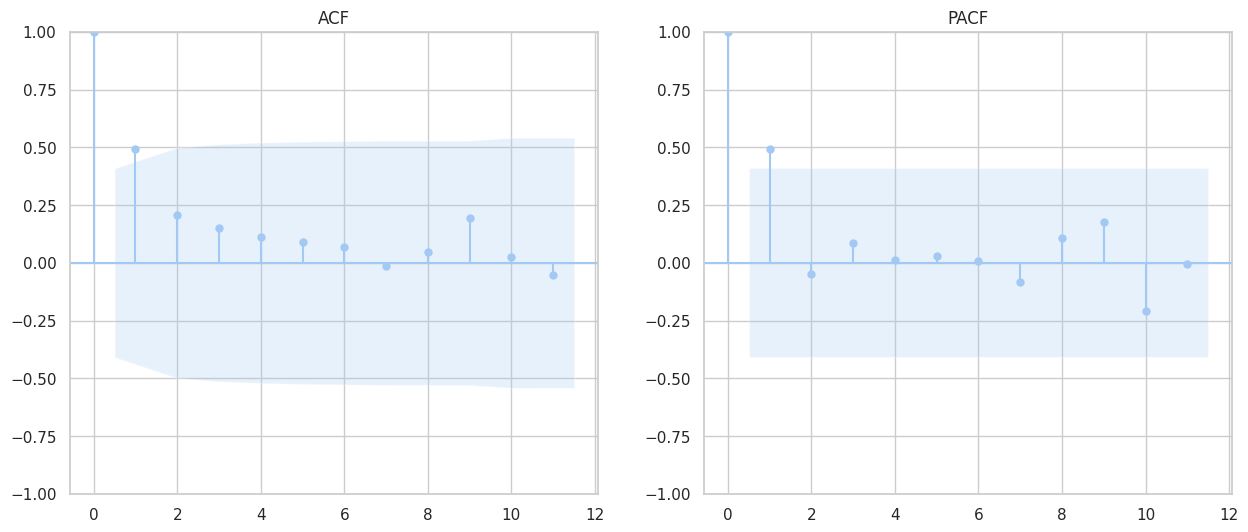

Анализ завершен.


In [33]:
pipeline(df, 'bezr(cfo)', plot_diff_series=True, plot_acf_pacf_flag=True)

In [34]:
pipeline(df, 'bezr(ufo)', plot_diff_series=False, plot_acf_pacf_flag=False)

ADF Statistic: -2.5448248980818597
p-value: 0.10494527019480482
Critical Values: {'1%': -3.769732625845229, '5%': -3.005425537190083, '10%': -2.6425009917355373}
ADF Statistic: -2.5448248980818597
p-value: 0.10494527019480482
Critical Values: {'1%': -3.769732625845229, '5%': -3.005425537190083, '10%': -2.6425009917355373}
ADF Statistic: 0.8294880679823573
p-value: 0.9920975535603199
Critical Values: {'1%': -4.137829282407408, '5%': -3.1549724074074077, '10%': -2.7144769444444443}
ADF Statistic: 1.576961915657635
p-value: 0.9977867869711872
Critical Values: {'1%': -4.137829282407408, '5%': -3.1549724074074077, '10%': -2.7144769444444443}
ADF Statistic: 1.0763952559368515
p-value: 0.9950100444711059
Critical Values: {'1%': -4.223238279489106, '5%': -3.189368925619835, '10%': -2.729839421487603}
ADF Statistic: -2.704969712973984
p-value: 0.073182232742945
Critical Values: {'1%': -4.223238279489106, '5%': -3.189368925619835, '10%': -2.729839421487603}
ADF Statistic: -6.467743170174151
p-va

In [35]:
pipeline(df, 'bezr(cfo)', plot_diff_series=False, plot_acf_pacf_flag=False)

ADF Statistic: -3.811750648580236
p-value: 0.0027893528260389696
Critical Values: {'1%': -3.769732625845229, '5%': -3.005425537190083, '10%': -2.6425009917355373}
Исходный ряд уже стационарен. Дифференциация не требуется.
Исходный ряд уже стационарен. Дифференциация не требуется.
Анализ завершен.


ADF Statistic: 3.127960427040384
p-value: 1.0
Critical Values: {'1%': -3.889265672705068, '5%': -3.0543579727254224, '10%': -2.66698384083045}
ADF Statistic: 3.127960427040384
p-value: 1.0
Critical Values: {'1%': -3.889265672705068, '5%': -3.0543579727254224, '10%': -2.66698384083045}
ADF Statistic: -3.2021400793653907
p-value: 0.01986113673562961
Critical Values: {'1%': -4.137829282407408, '5%': -3.1549724074074077, '10%': -2.7144769444444443}
Ряд стационарен после 1 дифференциаций.


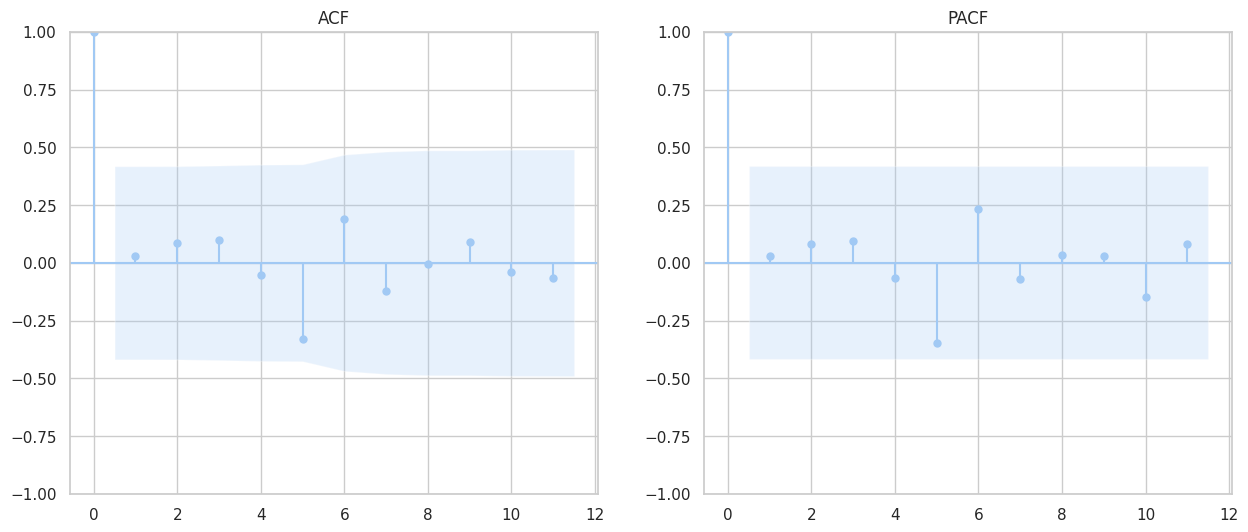

Анализ завершен.


In [36]:
pipeline(df, 'srd(cfo)', plot_diff_series=False, plot_acf_pacf_flag=True)

ADF Statistic: -3.811750648580236
p-value: 0.0027893528260389696
Critical Values: {'1%': -3.769732625845229, '5%': -3.005425537190083, '10%': -2.6425009917355373}
Исходный ряд уже стационарен. Дифференциация не требуется.
Исходный ряд уже стационарен. Дифференциация не требуется.


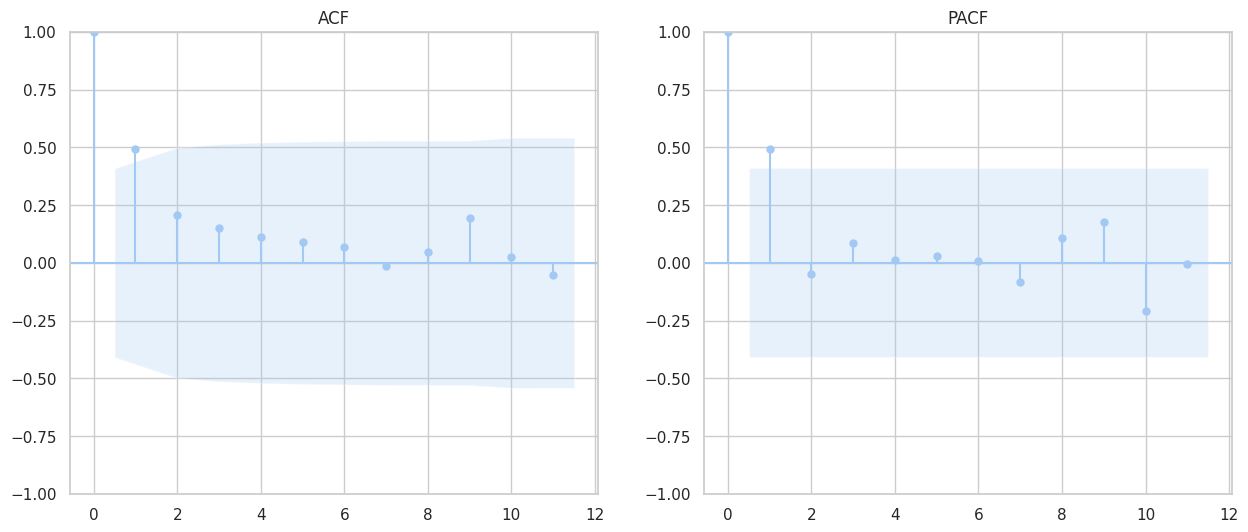

Анализ завершен.


In [37]:
pipeline(df, 'bezr(cfo)', plot_diff_series=False, plot_acf_pacf_flag=True)